In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
#import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

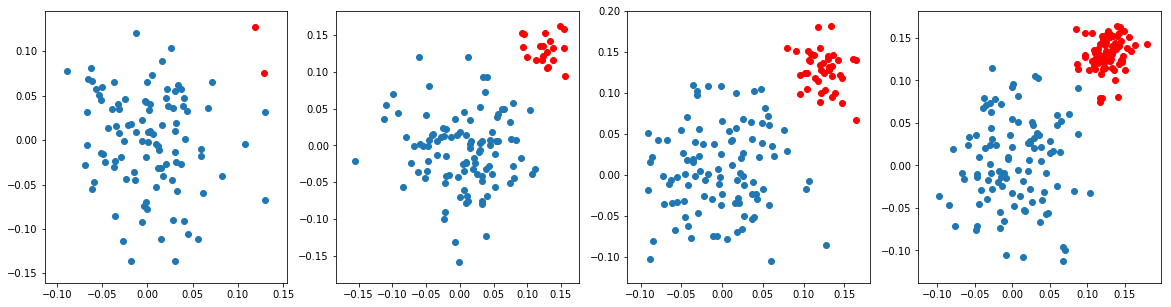

In [ ]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

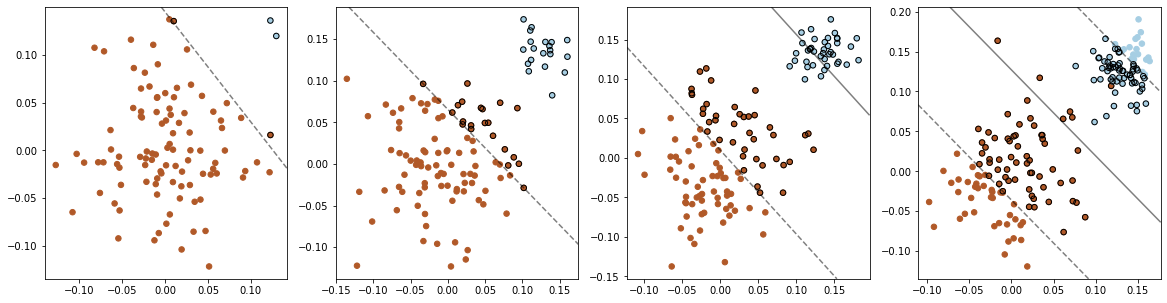

In [ ]:

def Plane( lr ) :
  ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

  plt.figure(figsize=(20,5))

  clf = SVC(kernel='linear', C= lr)

  for j,i in enumerate(ratios):
      plt.subplot(1, 4, j+1)
      X_p=np.random.normal(0,0.05,size=(i[0],2))
      X_n=np.random.normal(0.13,0.02,size=(i[1],2))

      y_p=np.array([1]*i[0]).reshape(-1,1)
      y_n=np.array([0]*i[1]).reshape(-1,1)

      X=np.vstack((X_p,X_n))
      y=np.vstack((y_p,y_n))
      clf.fit(X, y)

      #plt.scatter(X_p[:,0],X_p[:,1])
      #plt.scatter(X_n[:,0],X_n[:,1],color='red')
      plt.scatter(X[:,0],X[:,1] ,c=y, s=30, cmap=plt.cm.Paired) #, edgecolors='k')

      
      
      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      
      # plot the decision functions for both classifiers
      # get the separating hyperplane
      Z = clf.decision_function(xy).reshape(XX.shape)
      #https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
      # plot decision boundary and margins
      a = ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
      #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
      # plot support vectors
      ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                linewidth=1, facecolors='none', edgecolors='k')

  plt.show()

Plane( 1.0 )

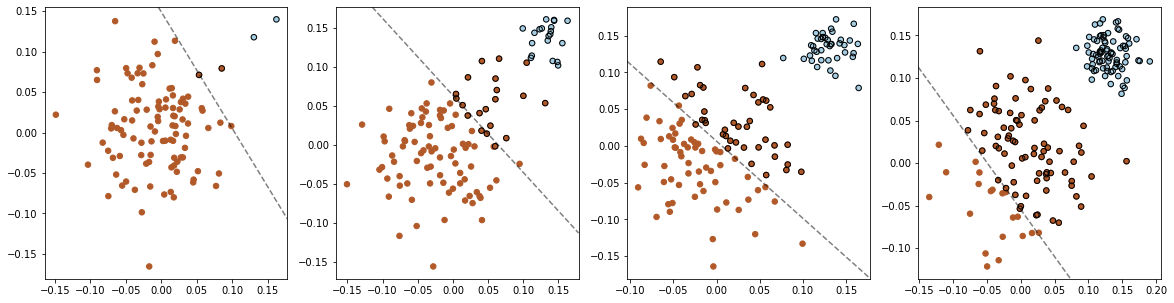

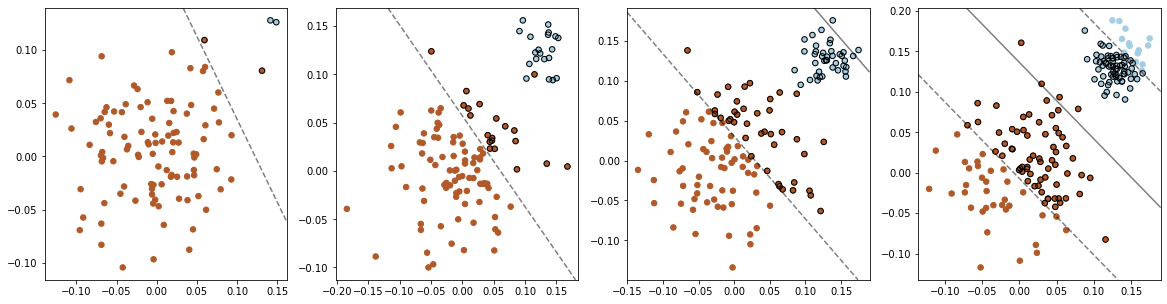

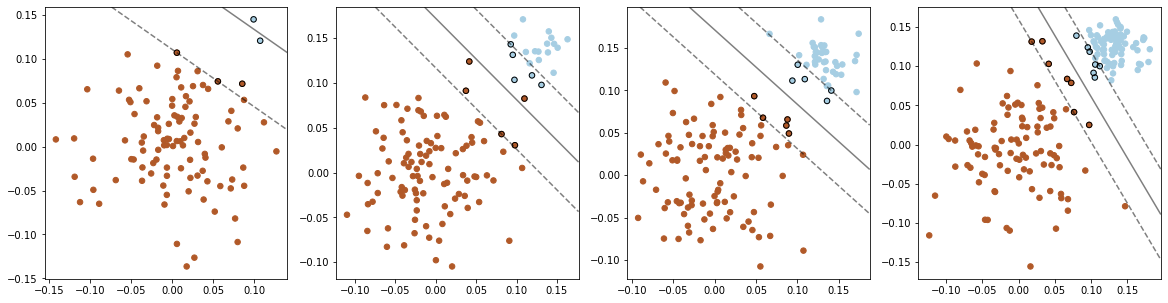

In [ ]:
Plane( 0.001 )
Plane( 1.0 )
Plane( 100 )

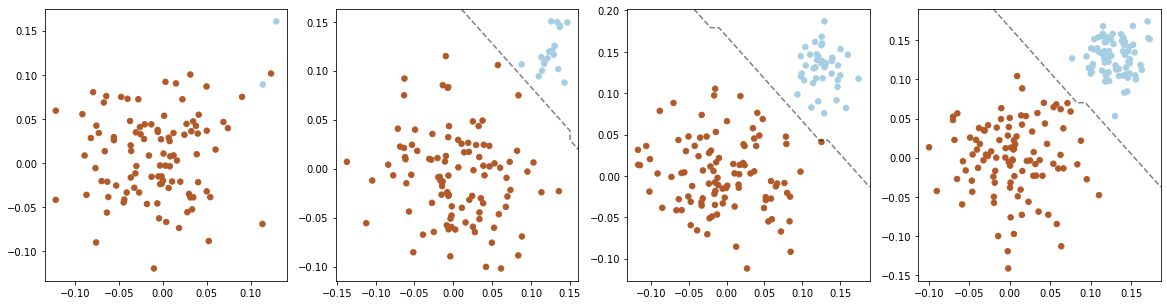

In [ ]:
#you can start writing code here.



ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

plt.figure(figsize=(20,5))

logreg = LogisticRegression(C=100)
  #clf = SVC(kernel='linear', C= lr)

for j,i in enumerate(ratios):
      plt.subplot(1, 4, j+1)
      X_p=np.random.normal(0,0.05,size=(i[0],2))
      X_n=np.random.normal(0.13,0.02,size=(i[1],2))

      y_p=np.array([1]*i[0]).reshape(-1,1)
      y_n=np.array([0]*i[1]).reshape(-1,1)

      X=np.vstack((X_p,X_n))
      y=np.vstack((y_p,y_n))
      #clf.fit(X, y)
      # Create an instance of Logistic Regression Classifier and fit the data.
      logreg.fit(X, y)

      plt.scatter(X[:,0],X[:,1] ,c=y, s=30, cmap=plt.cm.Paired) #, edgecolors='k')

      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      
      # plot the decision functions for both classifiers
      # get the separating hyperplane
      #Z = clf.decision_function(xy).reshape(XX.shape)
      #Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = logreg.predict(xy)
      Z = Z.reshape(XX.shape)
      #https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
      # plot decision boundary and margins
      '''a = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']) '''
      #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
      # plot support vectors
      '''ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                linewidth=1, facecolors='none', edgecolors='k')'''
'''
      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      h = .02  # step size in the mesh
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(1, figsize=(4, 3))
      plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

      # Plot also the training points
      plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
      plt.xlabel('Sepal length')
      plt.ylabel('Sepal width')

      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.xticks(())
      plt.yticks(())
'''
'''
      coef = clf.coef_
      intercept = clf.intercept_
      y_min = np.amin(X)
      y_max = np.amax(X)
      hyper_plane = draw_hyper_plane(coef,intercept,y_min,y_max)

      plt.scatter(X,Y,color='green')'''

plt.show()

[-0.1992518  -0.25462733]
[3.9122636]
[-1.88389357 -1.79886797]
[1.71370889]
[-2.9759272  -3.06648631]
[1.17767609]
[-4.00756622 -3.99561876]
[0.7083924]


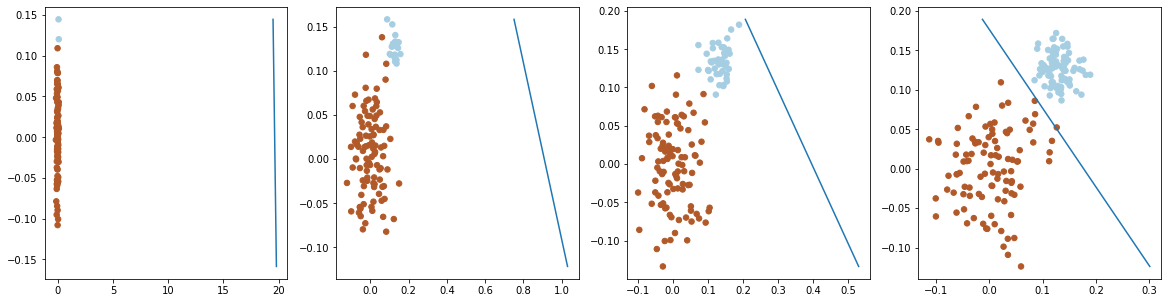

In [ ]:
def draw_line_(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[0]*mi - intercept)/coef[0]), mi],[((-coef[0]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])


ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

plt.figure(figsize=(20,5))

clf = LogisticRegression(C=1.0)
  #clf = SVC(kernel='linear', C= lr)

for j,i in enumerate(ratios):
      plt.subplot(1, 4, j+1)
      X_p=np.random.normal(0,0.05,size=(i[0],2))
      X_n=np.random.normal(0.13,0.02,size=(i[1],2))

      y_p=np.array([1]*i[0]).reshape(-1,1)
      y_n=np.array([0]*i[1]).reshape(-1,1)

      X=np.vstack((X_p,X_n))
      y=np.vstack((y_p,y_n))
      #clf.fit(X, y)
      # Create an instance of Logistic Regression Classifier and fit the data.
      clf.fit(X, y)

      plt.scatter(X[:,0],X[:,1] ,c=y, s=30, cmap=plt.cm.Paired) #, edgecolors='k')

      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      
      # plot the decision functions for both classifiers
      # get the separating hyperplane
      #Z = clf.decision_function(xy).reshape(XX.shape)
      #Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = logreg.predict(xy)
      Z = Z.reshape(XX.shape)
      #https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
      # plot decision boundary and margins
      '''a = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']) '''
      #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
      # plot support vectors
      '''ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                linewidth=1, facecolors='none', edgecolors='k')'''
      
      coef = clf.coef_
      print(coef[0])
      intercept = clf.intercept_
      print(intercept)
      y_min = np.amin(X)
      y_max = np.amax(X)
      hyper_plane = draw_line_(coef[0],intercept,y_min,y_max)

      #plt.scatter(X,y,color='green')
      '''y_min = np.amin(X)
      y_max = np.amax(X)'''
      '''hyper_plane = draw_hyper_plane(coef,intercept,y_min,y_max)
      plt.scatter(X,Y,color='green')'''    

plt.show()



[[-32.46794036 -34.85718371]]
[[-44.88361006 -50.41038609]]
[[-48.10729083 -42.56900998]]
[[-50.56055414 -60.15911294]]


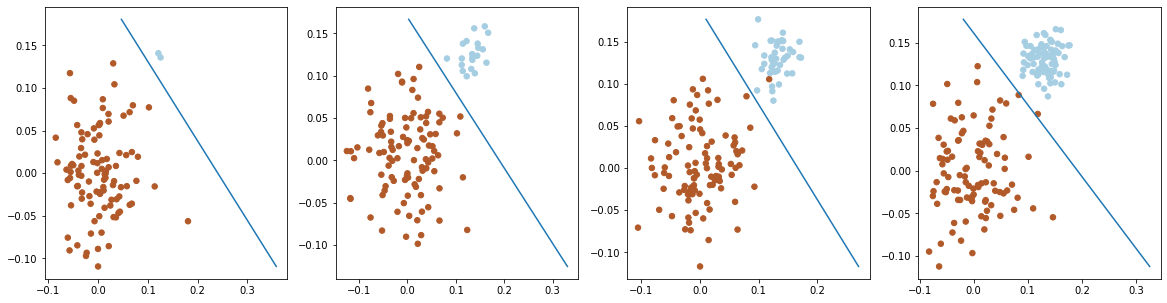

In [ ]:
def draw_line_(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

def do_plot_by_LogisticRegression():

  ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

  plt.figure(figsize=(20,5))

  clf = LogisticRegression(C=1000.0)
    #clf = SVC(kernel='linear', C= lr)

  for j,i in enumerate(ratios):
        plt.subplot(1, 4, j+1)
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))

        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)

        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        #clf.fit(X, y)
        # Create an instance of Logistic Regression Classifier and fit the data.
        clf.fit(X, y)

        plt.scatter(X[:,0],X[:,1] ,c=y, s=30, cmap=plt.cm.Paired) #, edgecolors='k')

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        
        # plot the decision functions for both classifiers
        # get the separating hyperplane
        #Z = clf.decision_function(xy).reshape(XX.shape)
        #Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
        y_pred = clf.predict(xy)
        y_pred = y_pred.reshape(XX.shape)
        #https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
        # plot decision boundary and margins
        '''a = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']) '''
        #ax.contour(XX, YY, y_pred, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
        # plot support vectors
        '''ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                  linewidth=1, facecolors='none', edgecolors='k')'''
        
        coef = clf.coef_
        print(coef)
        intercept = clf.intercept_
        #print(intercept)
        y_min = np.amin(X)
        y_max = np.amax(X)
        hyper_plane = draw_line_(coef[0],intercept,y_min,y_max)

        #plt.scatter(X,y,color='green')
        '''y_min = np.amin(X)
        y_max = np.amax(X)'''
        '''hyper_plane = draw_hyper_plane(coef,intercept,y_min,y_max)
        plt.scatter(X,Y,color='green')'''    

  plt.show()

do_plot_by_LogisticRegression()


(180, 2)
(-0.17310623552998128, 0.20093903516428135) (-0.172097658375463, 0.19344037379270973)
(900, 2)
122


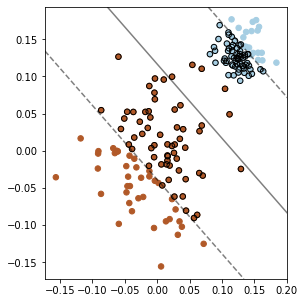

In [ ]:

def Plane_svm( lr ) :
  ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

  plt.figure(figsize=(20,5))

  clf = SVC(kernel='linear', C= lr)

  for j,i in enumerate(ratios[3:4]):
      plt.subplot(1, 4, j+1)
      X_p=np.random.normal(0,0.05,size=(i[0],2))
      X_n=np.random.normal(0.13,0.02,size=(i[1],2))

      y_p=np.array([1]*i[0]).reshape(-1,1)
      y_n=np.array([0]*i[1]).reshape(-1,1)

      X=np.vstack((X_p,X_n))
      y=np.vstack((y_p,y_n))
      print( X.shape )
      clf.fit(X, y)

      #plt.scatter(X_p[:,0],X_p[:,1])
      #plt.scatter(X_n[:,0],X_n[:,1],color='red')
      plt.scatter(X[:,0],X[:,1] ,c=y, s=30, cmap=plt.cm.Paired) #, edgecolors='k')

      
      
      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()
      print(xlim , ylim )

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      print( xy.shape )
      # plot the decision functions for both classifiers
      # get the separating hyperplane
      Z = clf.decision_function(xy).reshape(XX.shape)
      #https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
      # plot decision boundary and margins
      a = ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
      #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
      # plot support vectors
      print(len(clf.support_vectors_[:,0] ) )
      ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                linewidth=1, facecolors='none', edgecolors='k')

  plt.show()

Plane_svm( 1.0 )


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[[ 0.13252649 -0.12      ]
 [-0.17881397  0.17      ]]


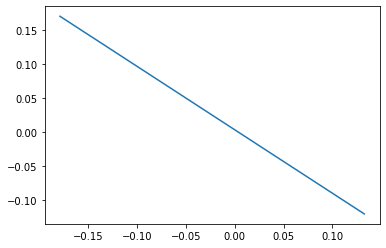

In [ ]:
def draw_line_only(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    print( points )
    plt.plot(points[:,0], points[:,1])


coef_ = [-32.46794036 ,-34.85718371]#[-50.56055414 , -60.15911294]
intercept_ = 0.12
y_min = -0.12
y_max = 0.17
draw_line_only(coef_,intercept_, y_min, y_max)
